# Statistics
Statistics referes to the mathematics and techniques with which we understand data.

In [34]:
from typing import List
import math

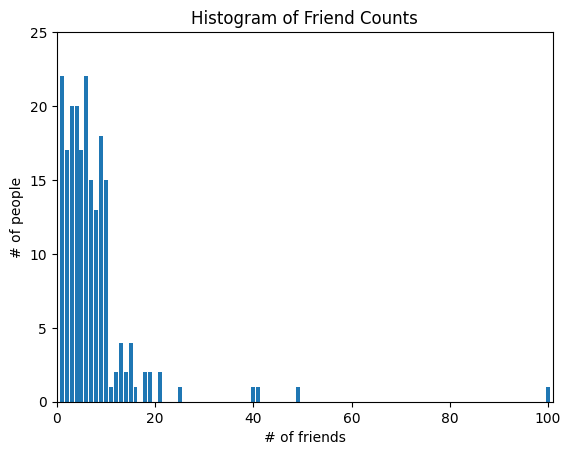

In [35]:
from collections import Counter 
import matplotlib.pyplot as plt 
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,
               14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,
               10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,
               9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,
               7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
               6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,
               4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
               3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,
               1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
friend_counts = Counter(num_friends) 
xs = range(101)                         
ys = [friend_counts[x] 
# largest value is 100 
for x in xs]     # height is just # of friends 
plt.bar(xs, ys) 
plt.axis([0, 101, 0, 25]) 
plt.title("Histogram of Friend Counts") 
plt.xlabel("# of friends") 
plt.ylabel("# of people") 
plt.show()

In [36]:
nums_point=len(num_friends) 
# You're probably interested in largest and smallest value as well
largest_value=max(num_friends)
print(largest_value)
smallest_num=min(num_friends)
print(smallest_num)

100.0
1


In [37]:
# Which are just special cases of wanting to know the values
# in specific positions:
sorted_values=sorted(num_friends)
smallest_value=sorted_values[0]
second_smallest_value=sorted_values[1]
largest_value=sorted_values[-1]
print(largest_value)
print(smallest_value)

100.0
1


In [38]:
def mean(xs: List[float])->float:
    return sum(xs)/len(xs)
print(mean(num_friends))

7.333333333333333


### Median

In [39]:
# The underscore indicates that these are private functions,as they're 
# intended to be called by our median function not by other people
# using our statistics library

def _median_odd(xs: List[float])->float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs)//2]

def _median_even(xs:List[float])-> float:
    """If len(xs) is even, its the average of the middle 2 elements"""
    sorted_xs=sorted(xs)
    hi_midpoint=len(xs)//2
    return (sorted_xs[hi_midpoint-1] + sorted_xs[hi_midpoint])/2

def median(v:List[float])-> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) %2 ==0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5 ,"Values are not the same"
assert median([1, 9, 2, 10]) == (2 + 9) / 2 ,"Values are not the same"

print(median(num_friends))

6.0


### Quantile

A generalization of the median is the quantile, which represents the value under which a certain percentile of the data lies, the median represents the value under which 50% of the data lies.

In [40]:
def quantile(xs: List[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]
assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

Less commonly you might want to look at the mode, or most common value(s):

In [41]:
def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
    if count == max_count]
assert set(mode(num_friends)) == {1, 6}

### Dispersion

Dispersion is a way of measuring how spread out the data is. These measures tell us how much the values in a dataset differ from each other. If the measure is close to zero, it means the data points are very close together, and if the value is large, it means the data points are more spread out. One simple way to measure this is by calculating the range, which is just the difference between the largest and smallest values in the data.

In [42]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)
assert data_range(num_friends) == 99

The range is zero precisely when the max and min are equal, which can only
happen if the elements of x are all the same, which means the data is as
undispersed as possible. Conversely, if the range is large, then the max is
much larger than the min and the data is more spread out.

Like the median, the range doesn’t really depend on the whole dataset. A
dataset whose points are all either 0 or 100 has the same range as a dataset
whose values are 0, 100, and lots of 50s. But it seems like the first dataset
“should” be more spread out.

A more complex measure of dispersion is the variance, which is computed as: 

In [43]:
Vector = List[float]
def sum_of_squares(v:Vector)->float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v,v)

def dot(v: Vector, w:Vector)-> float:
    """Computes v_1 * w_1 + ... + v_n * w_n""" 
    assert len(v)==len(w), "vectors must be same lenght"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [55]:
assert dot([1, 2, 3], [4, 5, 6]) == 32  # 1 * 4 + 2 * 5 + 3 * 6

# why do you think this function is called de_mean?
def de_mean(xs: List[float])-> List[float]:
    """ Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar=mean(xs)
    return [x-x_bar for x in xs]

def variance(xs: List[float])->float:
    """ Almost the average squared deviation from the mean"""
    assert len(xs)>=2,  "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

# assert 81.54 < variance(num_friends) < 81.55
print(variance(num_friends))

81.54351395730716


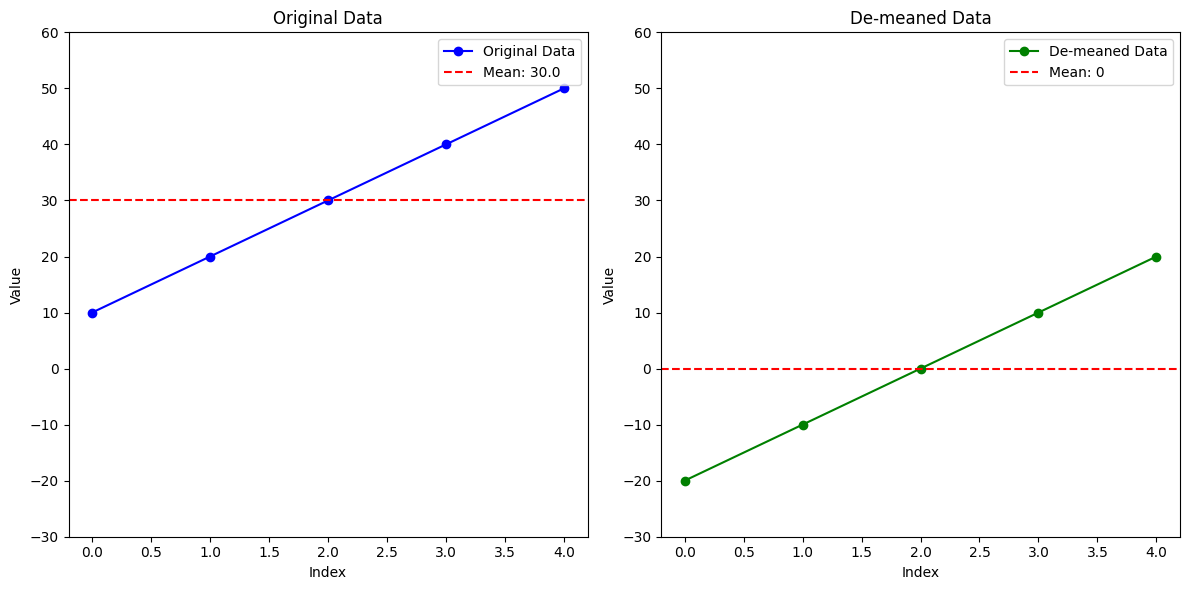

In [53]:
import matplotlib.pyplot as plt

# Example data
xs = [10, 20, 30, 40, 50]

# Calculate the mean
x_bar = sum(xs) / len(xs)

# De-mean the data
demeaned_xs = [x - x_bar for x in xs]

# Set the y-axis limits for both plots
y_limits = (min(demeaned_xs) - 10, max(xs) + 10)

# Plotting the data
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
plt.plot(xs, 'bo-', label='Original Data')
plt.axhline(y=x_bar, color='r', linestyle='--', label=f'Mean: {x_bar}')
plt.ylim(y_limits)
plt.title('Original Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# De-meaned data
plt.subplot(1, 2, 2)
plt.plot(demeaned_xs, 'go-', label='De-meaned Data')
plt.axhline(y=0, color='r', linestyle='--', label='Mean: 0')
plt.ylim(y_limits)
plt.title('De-meaned Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


Basically the whole dataset gets *shifted* below its initial position by mean.

Now, whatever units our data is in (e.g., “friends”), all of our measures of
central tendency are in that same unit. The range will similarly be in that
same unit. The variance, on the other hand, has units that are the square of
the original units (e.g., “friends squared”). As it can be hard to make sense
of these, we often look instead at the standard deviation:

In [45]:
def standard_deviation(xs: List[float])->float:
    """The standard deviation is the square root of variance"""
    return math.sqrt(variance(xs))

assert 9.02 < standard_deviation(num_friends) < 9.04

**But what's the significance of Standard Deviation?**

A large standard deviation indicates that the data points are spread out over a wider range, which means there’s high variability from the mean. Conversely, a small standard deviation means that the data points tend to be closer to the mean, indicating less variability.

A standard deviation helps to understand the distribution of data. For instance, in a normal distribution:

- About 68% of the data lies within one standard deviation of the mean.
- About 95% of the data lies within two standard deviations of the mean.
- About 99.7% of the data lies within three standard deviations of the mean.

Both the range and the standard deviation have the same outlier problem that we saw earlier for the mean. Using the same example, if our friendliest
user had instead 200 friends, the standard deviation would be 14.89—more
than 60% higher!

If you think about the outlier problem we're talking about, it is obvious that SD(standard deviation) is prone to that problem because the SD itself is calculated using the mean(which is prone to the outlier problem).

A more robust alternative computes the difference between the 75th percentile value and the 25th percentile value, which is quite plainly unaffected by a small number of outliers:

In [46]:
def interquartile_range(xs: Vector)->float:
    """ Returns the difference between teh 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends)==6

## Correlation

### Covariance

In [50]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,
                 34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,
                 28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,
                 31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,
                 33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,
                 46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,
                 38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,
                 15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,
                 13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,
                 25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,
                 34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,
                 35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,
                 18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,
                 25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,
                 18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,
                 29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,
                 18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,
                 13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,
                 28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,
                 31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,
                 10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,
                 22.61,26.89,23.48,8.38,27.81,32.35,23.84]
daily_hours = [dm / 60 for dm in daily_minutes]

def covariance(xs: Vector, ys:Vector)->float:
    assert len(xs) == len(ys), " xs and ys must have same number of elements "
    return dot(de_mean(xs), de_mean(ys)) / (len(xs)-1)

assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

Now, what does covariance tell us?

- A positive covariance means that when one variable goes up, the other tends to go up too (or when one goes down, the other tends to go down).
- A negative covariance means that when one variable goes up, the other tends to go down (and vice versa).
- A covariance close to zero means there's no clear relationship between how the two variables change.

Nonetheless, this number can be hard to interpret, for a couple of reasons:

- Its units are the product of the inputs' units  (e.g., friend-minutesper-day), which can be hard to make sense of. (What’s a “friendminute-per-day”?)

- If each user had twice as many friends (but the same number of minutes), the covariance would be twice as large. But in a sense, the variables would be just as interrelated. Said differently, it’s hard to say what counts as a “large” covariance.

For this reason, it’s more common to look at the correlation, which divides
out the standard deviations of both variables:

In [56]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero
assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25

The correlation is unitless and always lies between –1 (perfect
anticorrelation) and 1 (perfect correlation). A number like 0.25 represents a
relatively weak positive correlation.

In [3]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,
                 34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,
                 28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,
                 31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,
                 33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,
                 46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,
                 38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,
                 15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,
                 13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,
                 25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,
                 34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,
                 35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,
                 18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,
                 25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,
                 18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,
                 29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,
                 18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,
                 13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,
                 28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,
                 31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,
                 10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,
                 22.61,26.89,23.48,8.38,27.81,32.35,23.84]

num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,
               14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,
               10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,
               9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,
               7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
               6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,
               4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
               3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,
               1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]


# give me the code to draw a 